<a href="https://colab.research.google.com/github/dariiimo/nlp2021/blob/main/lab6/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.2 MB/s 
     |████████████████████████████████| 61 kB 433 kB/s 
     |████████████████████████████████| 596 kB 76.9 MB/s 
     |████████████████████████████████| 3.3 MB 71.2 MB/s 
     |████████████████████████████████| 895 kB 46.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import os
import numpy as np
import pandas as pd
from transformers import BertTokenizer, TFBertModel
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [6]:
os.environ["WANDB_API_KEY"] = "0" # to silence warning

In [7]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU
    print('Number of replicas:', strategy.num_replicas_in_sync)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.83.25.210:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.83.25.210:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [8]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [ ]:
df_train.head(7) # check data (first 7 rows)

In [10]:
df_test.head(7) # check data (first 7 rows)

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian
5,aa2510d454,His family had lost a son and a daughter now.,The son and daughter had lost their father.,en,English
6,865d1c7b16,Steps are initiated to allow program board mem...,There's enough room for 35-40 positions on the...,en,English


In [11]:
df_train.shape # check data

(12120, 6)

In [12]:
df_test.shape # check data

(5195, 5)

In [13]:
# "premise" column
df_train["premise"].values[0]

'and these comments were considered in formulating the interim rules.'

In [14]:
# "hypothesis" column
df_train["hypothesis"].values[0]

'The rules developed in the interim were put together with these comments in mind.'

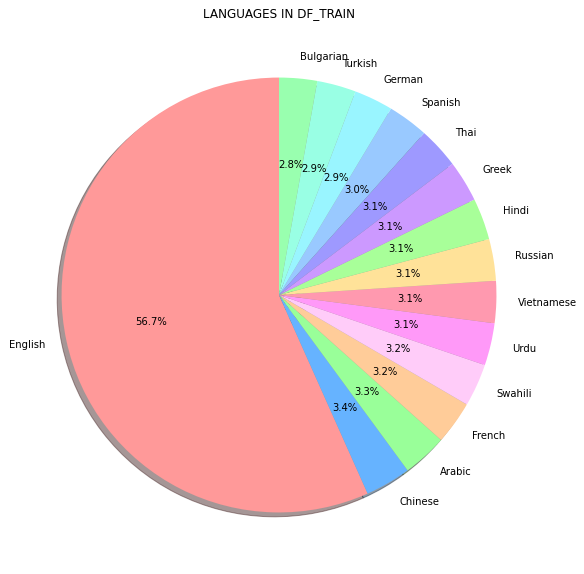

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
count_classes = df_train['language'].value_counts() # count sentenses in each language
plt.title("Languages in df_train".upper())
colors = ['#ff9999','#66b3ff','#99ff99',
          '#ffcc99', '#ffccf9', '#ff99f8', 
          '#ff99af', '#ffe299', '#a8ff99',
          '#cc99ff', '#9e99ff', '#99c9ff',
          '#99f5ff', '#99ffe4', '#99ffaf']

plt.pie(count_classes, 
        labels = count_classes.index, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90, 
        colors=colors)

plt.show()

In [16]:
def plot_stats(df, column, ax, color, angle):
    """ PLOT STATS OF DIFFERENT COLUMNS """
    count_classes = df[column].value_counts()
    ax = sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette=color)
    ax.set_title(column.upper(), fontsize=18)
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)

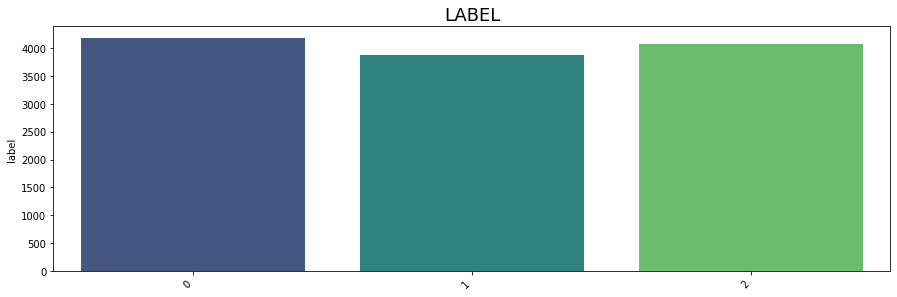

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
fig.autofmt_xdate()
plot_stats(df_train, "label", axes, "viridis", 45)
plt.show()

In [18]:
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [19]:
len(tokenizer.vocab) # check the vocabulary size

119547

In [20]:
def encode_sentence(s):
    """ ENCODE SENTENCES WITH TOKENIZER"""
    tokens = list(tokenizer.tokenize(s))
    tokens.append('[SEP]')
    return tokenizer.convert_tokens_to_ids(tokens)

In [21]:
encode_sentence("you know they can't really defend themselves")

[13028, 21852, 10689, 10944, 112, 188, 30181, 60041, 20182, 102]

In [22]:
def bert_encode(hypotheses, premises, tokenizer):
    """ ENCODE DATA FOR BERT"""
    num_examples = len(hypotheses)
    print("num_examples = ", num_examples)
    sentence1 = tf.ragged.constant([encode_sentence(s) for s in np.array(hypotheses)])
    print("sentence1.shape = ", sentence1.shape)
    sentence2 = tf.ragged.constant([encode_sentence(s) for s in np.array(premises)])
    print("sentence2.shape = ", sentence2.shape)
    cls_ = [tokenizer.convert_tokens_to_ids(['[CLS]'])] * sentence1.shape[0]
    input_word_ids = tf.concat([cls_, sentence1, sentence2], axis=-1)
    print("input_word_ids.shape = ", input_word_ids.shape)
    # 300 - as my example
    # because we have train_input (12120; 259), test_input (5159; 234)
    # and shape[1] should be the same in each dataset
    # that is why we creating (xxx; 300) shape in to_tensor() functions  
    input_mask = tf.ones_like(input_word_ids).to_tensor(shape=(input_word_ids.shape[0], 300)) 
    print("input_mask.shape = ", input_mask.shape)
    
    type_cls = tf.zeros_like(cls_)
    type_s1 = tf.zeros_like(sentence1)
    type_s2 = tf.ones_like(sentence2)
    
    input_type_ids = tf.concat([type_cls, type_s1, type_s2], axis=-1).to_tensor(shape=(input_word_ids.shape[0], 300))
    
    inputs = {'input_word_ids': input_word_ids.to_tensor(shape=(input_word_ids.shape[0], 300)),
              'input_mask': input_mask,
              'input_type_ids': input_type_ids}
    print()
    
    return inputs

In [23]:
# encode data
train_input = bert_encode(df_train["premise"].values, df_train["hypothesis"].values, tokenizer)
test_input = bert_encode(df_test["premise"].values, df_test["hypothesis"].values, tokenizer)

num_examples =  12120
sentence1.shape =  (12120, None)
sentence2.shape =  (12120, None)
input_word_ids.shape =  (12120, None)
input_mask.shape =  (12120, 300)

num_examples =  5195
sentence1.shape =  (5195, None)
sentence2.shape =  (5195, None)
input_word_ids.shape =  (5195, None)
input_mask.shape =  (5195, 300)



In [24]:
train_input # check train input

{'input_mask': <tf.Tensor: shape=(12120, 300), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(12120, 300), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>,
 'input_word_ids': <tf.Tensor: shape=(12120, 300), dtype=int32, numpy=
 array([[  101, 10111, 11762, ...,     0,     0,     0],
        [  101, 13252, 10301, ...,     0,     0,     0],
        [  101, 13810, 32181, ...,     0,     0,     0],
        ...,
        [  101, 10117, 12452, ...,     0,     0,     0],
        [  101, 11699, 10105, ...,     0,     0,     0],
        [  101, 11399, 14764, ...,     

In [25]:
test_input # check test input

{'input_mask': <tf.Tensor: shape=(5195, 300), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(5195, 300), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>,
 'input_word_ids': <tf.Tensor: shape=(5195, 300), dtype=int32, numpy=
 array([[  101,   764, 28744, ...,     0,     0,     0],
        [  101, 13498, 11917, ...,     0,     0,     0],
        [  101, 10131, 24552, ...,     0,     0,     0],
        ...,
        [  101,  3239,  5755, ...,     0,     0,     0],
        [  101, 98370,   112, ...,     0,     0,     0],
        [  101, 10167, 15078, ...,     0, 

In [26]:
max_len = train_input["input_word_ids"].shape[1]

def create_model():
    """ BUILD MODEL """
    bert_encoder = TFBertModel.from_pretrained(model_name)
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    input_type_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_type_ids")

    embedding = bert_encoder([input_word_ids, input_mask, input_type_ids])[0]
    output = tf.keras.layers.Dense(3, activation='softmax')(embedding[:,0,:])

    model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=output)
    model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [27]:
with strategy.scope():
    model = create_model()
    model.summary()

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 300)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 300)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 300)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  177853440   ['input_word_ids[0][0]',         
                                thPoolingAndCrossAt               'input_mask[0][0]',         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
model_history = model.fit(train_input, 
                          df_train["label"].values, 
                          epochs = 5, 
                          verbose = 1,
                          batch_size = 128, 
                          validation_split = 0.2)

Epoch 1/5
76/76 [==============================] - ETA: 0s - loss: 1.0190 - accuracy: 0.4734

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 300) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 300) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 300) dtype=int32>, <tf.Tensor 'cond/Identity_24:0' shape=(None,) dtype=int64>]


76/76 [==============================] - 97s 1s/step - loss: 1.0190 - accuracy: 0.4734 - val_loss: 0.8869 - val_accuracy: 0.5998
Epoch 2/5
76/76 [==============================] - 26s 347ms/step - loss: 0.8078 - accuracy: 0.6406 - val_loss: 0.8279 - val_accuracy: 0.6357
Epoch 3/5
76/76 [==============================] - 26s 347ms/step - loss: 0.6729 - accuracy: 0.7161 - val_loss: 0.8098 - val_accuracy: 0.6522
Epoch 4/5
76/76 [==============================] - 26s 347ms/step - loss: 0.5461 - accuracy: 0.7800 - val_loss: 0.8566 - val_accuracy: 0.6514
Epoch 5/5
76/76 [==============================] - 26s 346ms/step - loss: 0.4236 - accuracy: 0.8370 - val_loss: 0.9906 - val_accuracy: 0.6481


In [32]:
def plot_NN_history(model_history, suptitle):
    # plot data
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    fig.suptitle(suptitle, fontsize=18)
    
    axes[0].plot(model_history.history['accuracy'], label='train accuracy', color='m', axes=axes[0])
    axes[0].plot(model_history.history['val_accuracy'], label='val accuracy', color='c', axes=axes[0])
    axes[0].set_title("Model Accuracy", fontsize=16) 
    axes[0].legend(loc='upper left')

    axes[1].plot(model_history.history['loss'], label='train loss', color='m', axes=axes[1])
    axes[1].plot(model_history.history['val_loss'], label='val loss', color='c', axes=axes[1])
    axes[1].set_title("Model Loss", fontsize=16) 
    axes[1].legend(loc='upper left')

    plt.show()

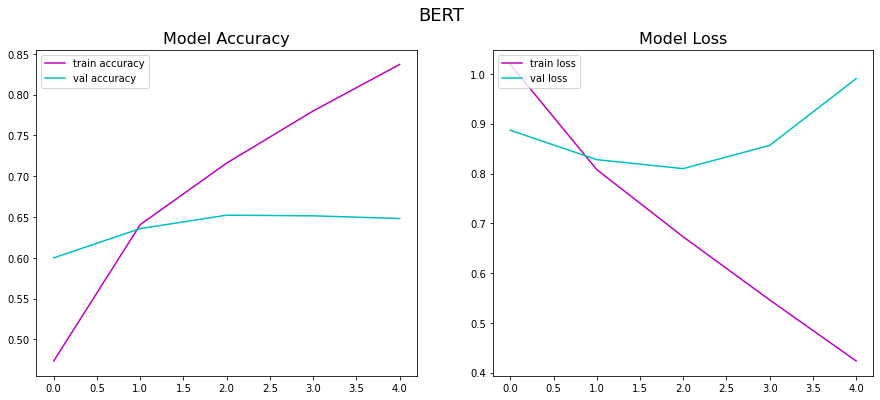

In [33]:
plot_NN_history(model_history, "BERT")

In [34]:
def calculate_results(y_true, y_pred):
    """ CALCULATE RESULTS"""
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [37]:
# get the probabilities
y_prob = model.predict(test_input)
# get the classes
y_hat = y_prob.argmax(axis=-1)
y_hat

array([2, 1, 0, ..., 1, 0, 2])